In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical 

In [5]:
# dataset.make_blobs() -> allows us to choose a cluster of datapoints centered around a random central point.
## Cluster of data points and central points is of our choice as well.

# centers -> a nested list for our center of coordinates for our cluster; points were chosen to provide a 
## a small degree of separation between the data classes.
# random_state -> we seed it to avoid generating random sets each and every time
# cluster_std -> a 0 keeps all the points very close and as it increases the points scatter

n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4 )


# Plot the points corresponding to the labels -> 0 centred at [-1,1]; 1 centred at [-1, -1], 2 centred at [1, -1]

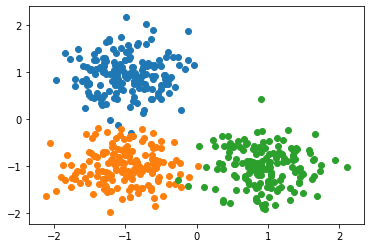

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

# to_categorical outputs the data in one hot end format

In [ ]:
y_cat = to_categorical(y, 3)

In [ ]:
# We use categorical cross entropy just because its a multiclass dataset
# We have 3 output nodes, hence unit = 3 and 2 input nodes with a bias

model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# We use hot encoding for the compiler to match the output labels with the dataset to calc the 
# errors in a better way

model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

### During the training process, for every epoch the network is fed with inputs are manipulated weights and bias of our system and then assigned with a score value into the nodes on output layer. Each node in the output layer belongs to a class. 
### And then, the activation function is computed using the score which outputs the probabilities. The node with the highest probabilty indicates that the input that was fed to the network has a label associated with its respective class. 

In [8]:
# model.predict_classes -> specific for multiclass data sets and it will test all the points in the 
# data set and returns an array of predictions

def plot_decision_boundary(X, y_cat, model) :
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    predictions_func = model.predict_classes(grid)
    z = predictions_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)